In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [28]:
import random

rand_selected = random.sample([x for x in range(0, len(x_train))], 30000)
x_train = x_train[rand_selected]
y_train = y_train[rand_selected]

print(f"shape of x_train is {tf.shape(x_train)}")
print(f"shape of y_train is {tf.shape(y_train)}")
print(f"shape of x_test is {tf.shape(x_test)}")
print(f"shape of y_test is {tf.shape(y_test)}")

shape of x_train is [30000    32    32     3]
shape of y_train is [30000    10]
shape of x_test is [10000    32    32     3]
shape of y_test is [10000    10]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


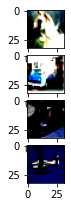

In [29]:
fig = plt.figure()

for i in range(1, 5):
    ax = fig.add_subplot(5, 1, i)
    ax.imshow(x_train[i])

In [30]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [31]:
mean = np.mean(x_train, axis=(0, 1, 2, 3))
std = np.std(x_train, axis=(0, 1, 2, 3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [32]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(x_train)

In [33]:
weight_decay = 1e-4
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), input_shape=x_train.shape[1:]),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)       

In [34]:
epoches = 100

opt = keras.optimizers.Adam()
los = keras.losses.CategoricalCrossentropy()
model.compile(loss=los, optimizer=opt, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=epoches, verbose=2, validation_data=(x_test, y_test))

Epoch 1/100


ValueError: in user code:

    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\keras\losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\s\anaconda3\envs\tf3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 10, 2) and (None, 10) are incompatible
